In [7]:
from process import *
from calculate import *
from plots import *
from envelopes import *
from supports import *

import numpy as np
import matplotlib.pyplot as plt

src = os.getcwd() + "/data/"

In [55]:
small = 10
medium = 12
big = 14

plt.rc('font', size=small)          # controls default text sizes
plt.rc('axes', titlesize=big)     # fontsize of the axes title
plt.rc('axes', labelsize=medium)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small)    # fontsize of the tick labels
plt.rc('legend', fontsize=medium)    # legend fontsize
plt.rc('figure', titlesize=big)     # fontsize of the figure title

# TLS, double-tone

In [56]:
Tdlr = src + "data_191106_084530_red_Nq2_Nt2_Omq0.05_wdq6.125_Omc0.63_wdc3.5_dw0.5_wq6.5_wc4.0_wsb0.0061"
Tdlb = src + "data_191106_075732_blue_Nq2_Nt2_Omq0.05_wdq7.12_Omc0.63_wdc3.5_dw0.5_wq6.5_wc4.0_wsb0.0049"
Tdsr = src + "data_191105_213449_red_Nq2_Nt2_Omq0.05_wdq3.401_Omc0.63_wdc6.0_dw0.5_wq4.0_wc6.5_wsb0.0038"
Tdsb = src + "data_191105_225432_blue_Nq2_Nt2_Omq0.05_wdq4.396_Omc0.63_wdc6.0_dw0.5_wq4.0_wc6.5_wsb0.0045"

quants = ['times', 'expect', 'e0', 'g1', 'e1', 'g0', 'coupling']

Td_times, _, Tdlr_expect, Tdlr_e0, Tdlr_g1, _      , _      , Td_coupling = load_data(quants, Tdlr)
_,        _, Tdlb_expect, _      , _      , Tdlb_e1, Tdlb_g0, _           = load_data(quants, Tdlb)
_,        _, Tdsr_expect, Tdsr_e0, Tdsr_g1, _      , _      , _           = load_data(quants, Tdsr)
_,        _, Tdsb_expect, _      , _      , Tdsb_e1, Tdsb_g0, _           = load_data(quants, Tdsb)

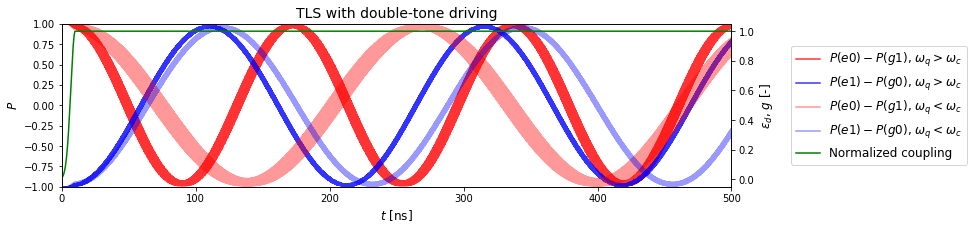

In [57]:
fig, ax1 = plt.subplots(figsize=[15,3])
ax2 = ax1.twinx()
ax2.tick_params(axis='y')

Tdlr_plot = ax1.plot(Td_times, Tdlr_e0-Tdlr_g1, c='r', alpha=0.8, label="$P(e0)-P(g1)$, $\\omega_q > \\omega_c$")
Tdlb_plot = ax1.plot(Td_times, Tdlb_e1-Tdlb_g0, c='b', alpha=0.8, label="$P(e1)-P(g0)$, $\\omega_q > \\omega_c$")
Tdsr_plot = ax1.plot(Td_times, Tdsr_e0-Tdsr_g1, c='r', alpha=0.4, label="$P(e0)-P(g1)$, $\\omega_q < \\omega_c$")
Tdsb_plot = ax1.plot(Td_times, Tdsb_e1-Tdsb_g0, c='b', alpha=0.4, label="$P(e1)-P(g0)$, $\\omega_q < \\omega_c$")
ax1.set_xlim([0, 500])
ax1.set_ylim([-1, 1])
Td_coupling = ax2.plot(Td_times, coupling, c='g', label="Normalized coupling")

ax1.set_xlabel("$t$ [ns]")
ax1.set_ylabel("$P$")
ax2.set_ylabel("$\\epsilon_d$, $g$ [-]")
ax1.set_title("TLS with double-tone driving")
plots = Tdlr_plot + Tdlb_plot + Tdsr_plot + Tdsb_plot + Td_coupling
labels = [plot.get_label() for plot in plots]
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(plots, labels, loc='center left', bbox_to_anchor=(1.08, 0.5))
box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.show()